In [2]:
from supervised_utils import *

### Task di regressione su `score`

In [4]:
df = pd.read_csv("../data/movies_features_reg_last30.csv")
print_info(df)

# cols: 20 | # rows: 4046

+-----------------------+---------+
|        Column         |  Type   |
+-----------------------+---------+
|          id           |  int64  |
|         title         | object  |
|          age          |  int64  |
|      rating_cat       | object  |
|       genre_cat       | object  |
|        runtime        | float64 |
|      popularity       | float64 |
|         score         | float64 |
|        budget         | float64 |
|   budget_efficiency   | float64 |
|     director_age      | float64 |
|  director_experience  |  int64  |
| director_is_acclaimed |  bool   |
|  director_is_panned   |  bool   |
|  director_efficiency  | float64 |
|       star_age        | float64 |
|    star_experience    |  int64  |
|   star_is_acclaimed   |  bool   |
|    star_is_panned     |  bool   |
|    star_efficiency    | float64 |
+-----------------------+---------+


In [5]:
# colonne per il training
cols = {
    "target": "score",
    "drop": ["id", "title"],
    "dummies": ["rating_cat", "genre_cat"],
    "labels": [],
    "standardize": ["runtime", "director_age", "star_age"],
    "minmax": ["popularity", "budget", "director_experience", "star_experience"]
}

***

TUNING & TRAINING <Ridge Reg>...

Results after GridSearchCV:
Best parameters: {'alpha': 0.5}
Best score: {'mean_squared_error': 0.5011}

> TESTING...
MAE: 0.5354
MSE: 0.5116

***

TUNING & TRAINING <Decision Tree Reg>...

Results after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 12, 'min_samples_split': 2}
Best score: {'mean_squared_error': 0.5431}

Results after max_depth tuning:
Best parameters: {'max_depth': 7}
Best score: {'mean_squared_error': 0.5235}



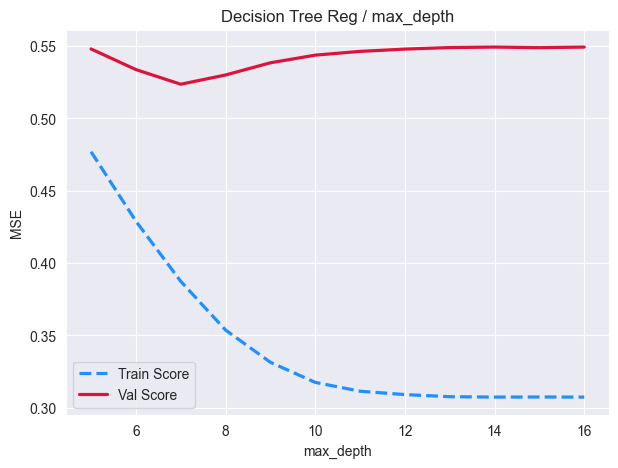

> TESTING...
MAE: 0.5788
MSE: 0.5801

***

TUNING & TRAINING <Random Forest Reg>...

Results after GridSearchCV:
Best parameters: {'criterion': 'friedman_mse', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best score: {'mean_squared_error': 0.4001}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 250}
Best score: {'mean_squared_error': 0.4005}



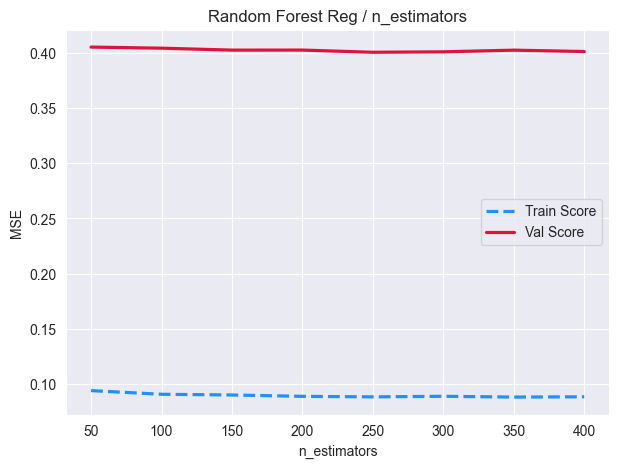

Results after max_depth tuning:
Best parameters: {'max_depth': 20}
Best score: {'mean_squared_error': 0.3983}



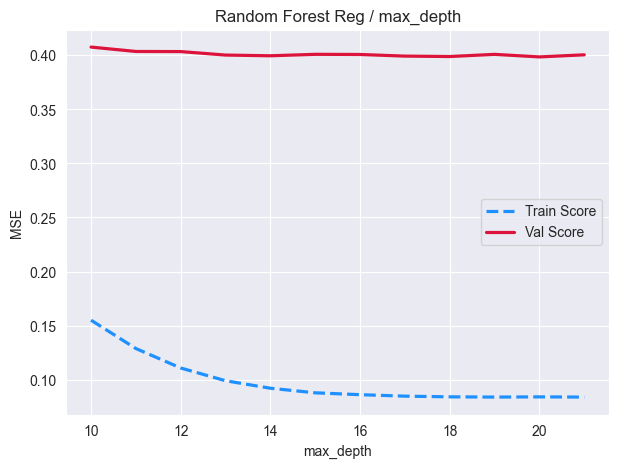

> TESTING...
MAE: 0.4849
MSE: 0.4368

***

TUNING & TRAINING <XGBoost Reg>...

Results after GridSearchCV:
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 1}
Best score: {'mean_squared_error': 0.3791}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 100}
Best score: {'mean_squared_error': 0.3791}



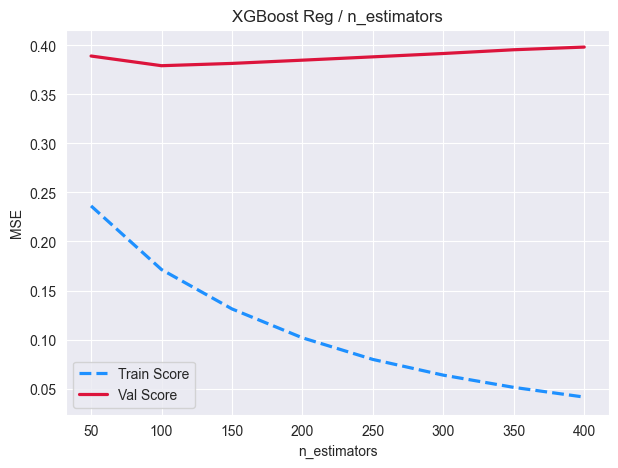

Results after max_depth tuning:
Best parameters: {'max_depth': 2}
Best score: {'mean_squared_error': 0.3837}



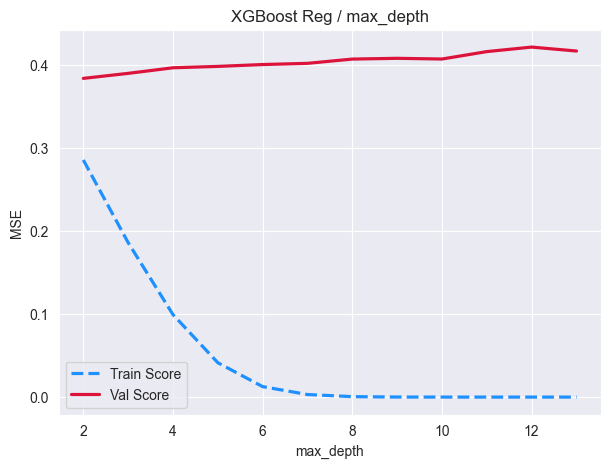

> TESTING...
MAE: 0.4912
MSE: 0.4523



In [6]:
# tuning e testing
tune_and_test_models(df, cols, task="regression", session_name="v2")

### Task di classificazione su `budget_efficiency`

In [7]:
df = pd.read_csv("../data/movies_features_cls_last30.csv")
print_info(df)

# cols: 20 | # rows: 4046

+-----------------------+---------+
|        Column         |  Type   |
+-----------------------+---------+
|          id           |  int64  |
|         title         | object  |
|          age          |  int64  |
|      rating_cat       | object  |
|       genre_cat       | object  |
|        runtime        | float64 |
|      popularity       | float64 |
|         score         | float64 |
|        budget         | float64 |
| budget_efficiency_cat | object  |
|     director_age      | float64 |
|  director_experience  |  int64  |
| director_is_acclaimed |  bool   |
|  director_is_panned   |  bool   |
|  director_efficiency  | float64 |
|       star_age        | float64 |
|    star_experience    |  int64  |
|   star_is_acclaimed   |  bool   |
|    star_is_panned     |  bool   |
|    star_efficiency    | float64 |
+-----------------------+---------+


In [8]:
# colonne per il training
cols = {
    "target": "budget_efficiency_cat",
    "drop": ["id", "title", "popularity"],
    "dummies": ["rating_cat", "genre_cat"],
    "labels": [],
    "standardize": ["runtime", "director_age", "star_age"],
    "minmax": ["budget", "director_experience", "star_experience"]
}

#### Con classi sbilanciate

***

TUNING & TRAINING <Logistic Regression Cls>...

Results after GridSearchCV:
Best parameters: {'max_iter': 10000, 'penalty': 'l2', 'solver': 'saga'}
Best score: {'accuracy': 0.5300}

> TESTING...
Accuracy: 50.74%



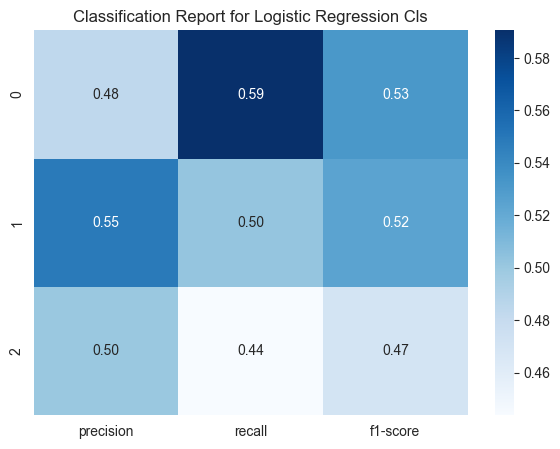

***

TUNING & TRAINING <Decision Tree Cls>...

Results after GridSearchCV:
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 2}
Best score: {'accuracy': 0.4926}

Results after max_depth tuning:
Best parameters: {'max_depth': 5}
Best score: {'accuracy': 0.4926}



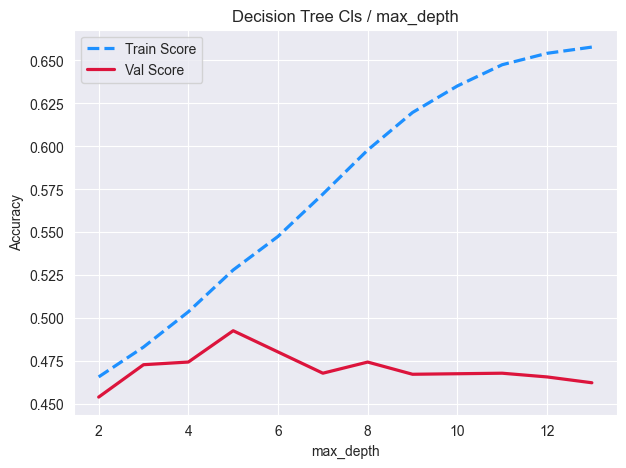

> TESTING...
Accuracy: 47.16%



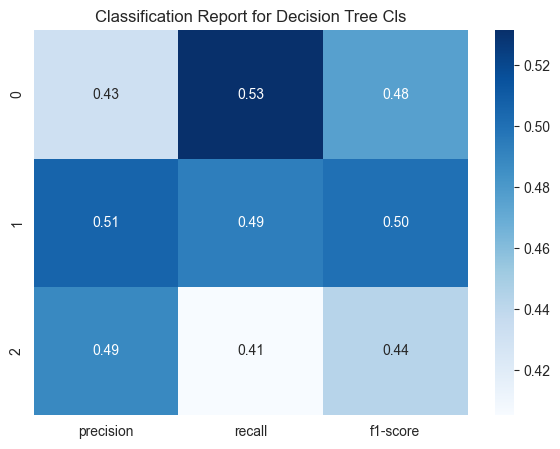

***

TUNING & TRAINING <Random Forest Cls>...

Results after GridSearchCV:
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best score: {'accuracy': 0.5346}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 300}
Best score: {'accuracy': 0.5327}



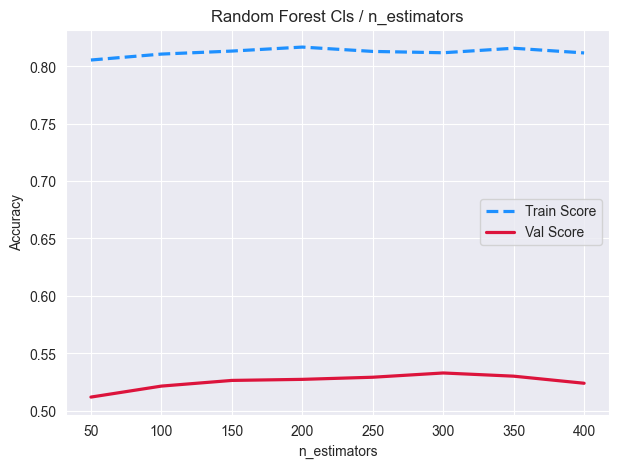

Results after max_depth tuning:
Best parameters: {'max_depth': 9}
Best score: {'accuracy': 0.5327}



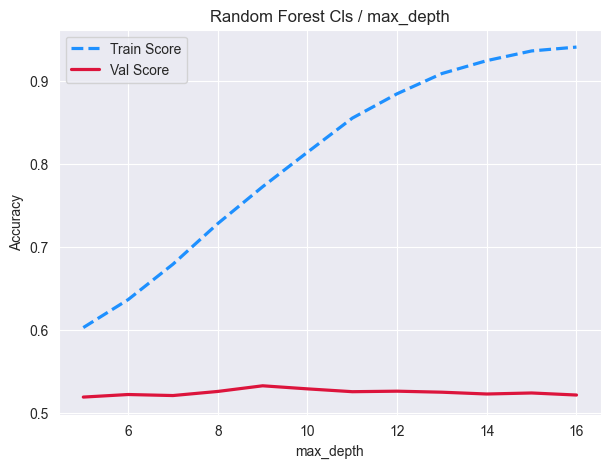

> TESTING...
Accuracy: 52.96%



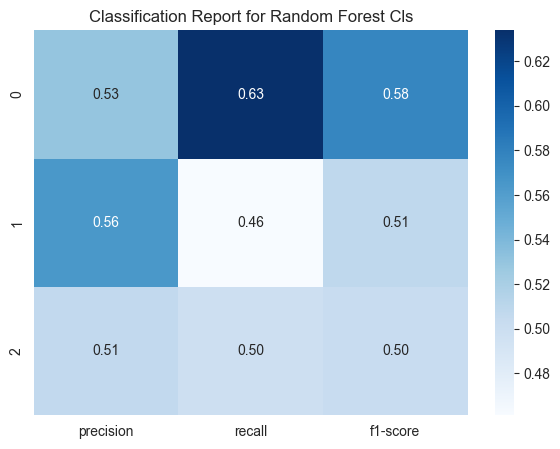

***

TUNING & TRAINING <XGBoost Cls>...

Results after GridSearchCV:
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 1}
Best score: {'accuracy': 0.5300}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 100}
Best score: {'accuracy': 0.5300}



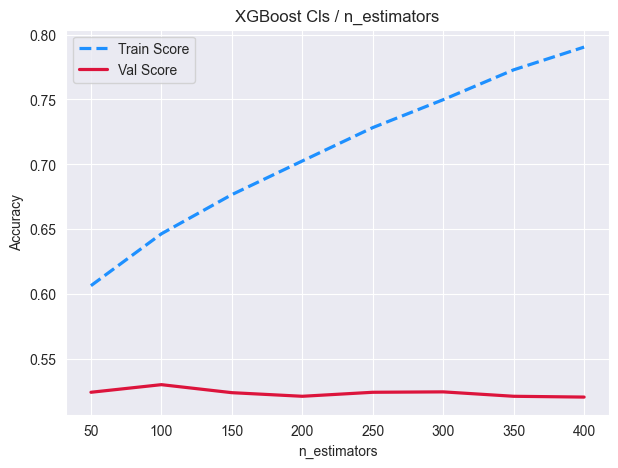

Results after max_depth tuning:
Best parameters: {'max_depth': 2}
Best score: {'accuracy': 0.5232}



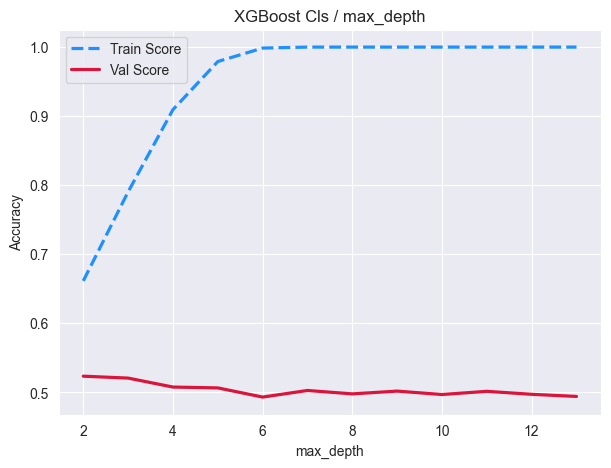

> TESTING...
Accuracy: 50.99%



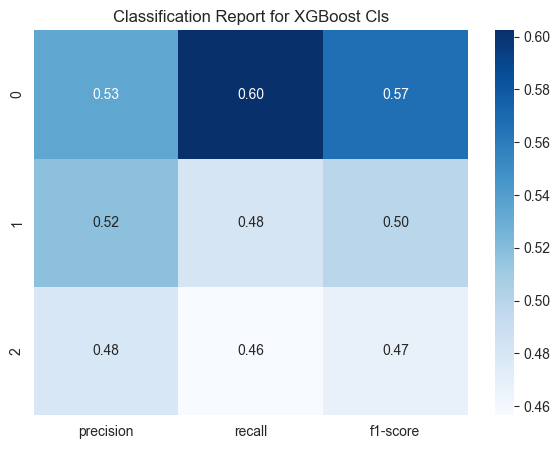

In [9]:
# tuning e testing
tune_and_test_models(df, cols, task="classification", resample=False, session_name="v2")

#### Con classi bilanciate

***

TUNING & TRAINING <Logistic Regression Cls>...

Results after GridSearchCV:
Best parameters: {'max_iter': 10000, 'penalty': 'l1', 'solver': 'saga'}
Best score: {'accuracy': 0.5502}

> TESTING...
Accuracy: 50.62%



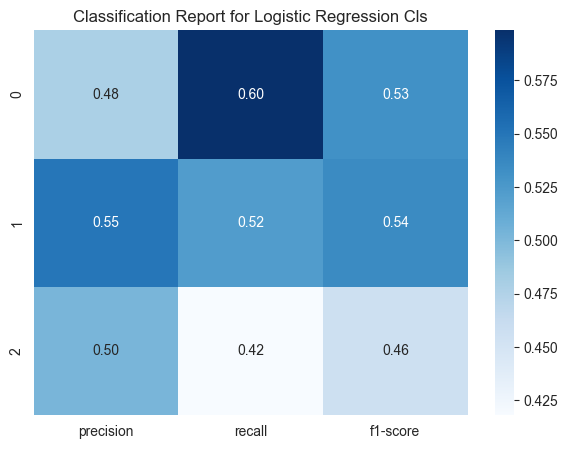

***

TUNING & TRAINING <Decision Tree Cls>...

Results after GridSearchCV:
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 2}
Best score: {'accuracy': 0.5000}

Results after max_depth tuning:
Best parameters: {'max_depth': 5}
Best score: {'accuracy': 0.5000}



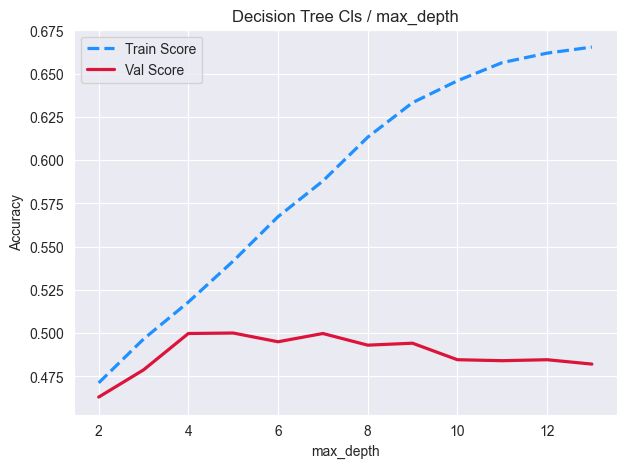

> TESTING...
Accuracy: 45.68%



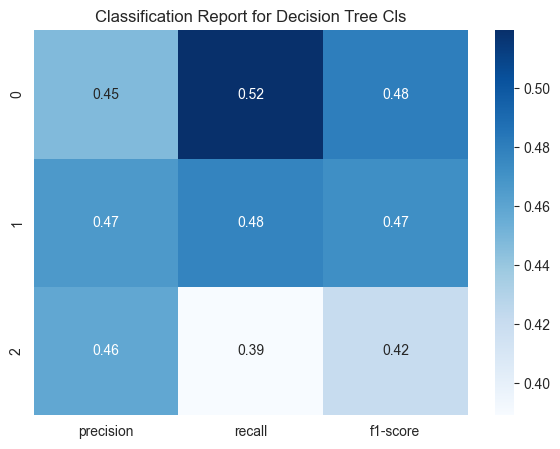

***

TUNING & TRAINING <Random Forest Cls>...

Results after GridSearchCV:
Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best score: {'accuracy': 0.5626}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 350}
Best score: {'accuracy': 0.5606}



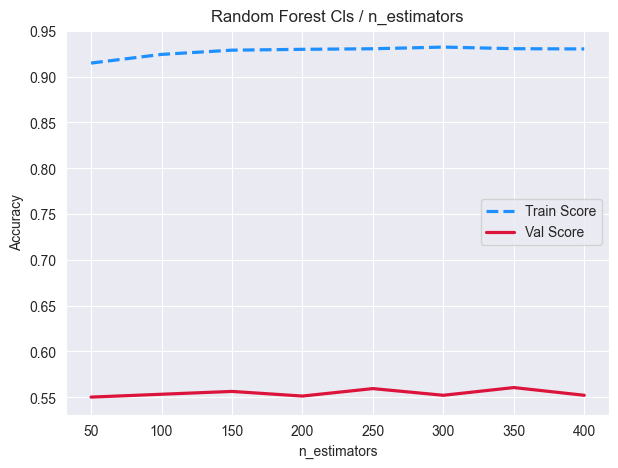

Results after max_depth tuning:
Best parameters: {'max_depth': 20}
Best score: {'accuracy': 0.5592}



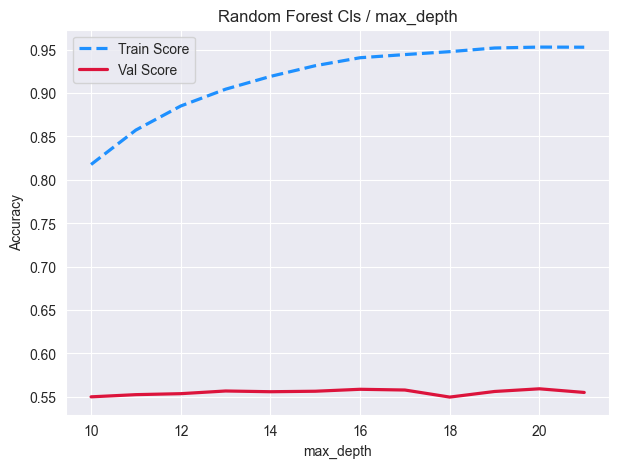

> TESTING...
Accuracy: 53.83%



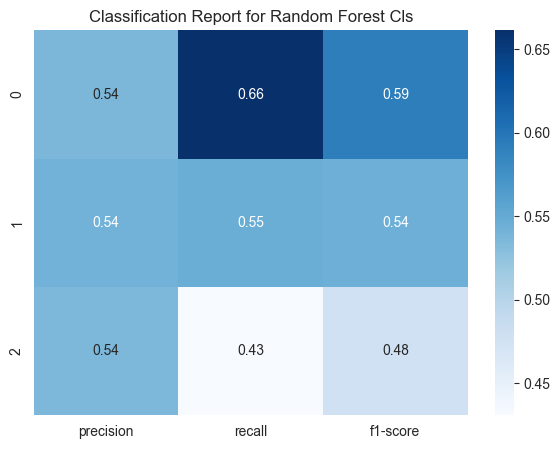

***

TUNING & TRAINING <XGBoost Cls>...

Results after GridSearchCV:
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.6}
Best score: {'accuracy': 0.5603}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 250}
Best score: {'accuracy': 0.5603}



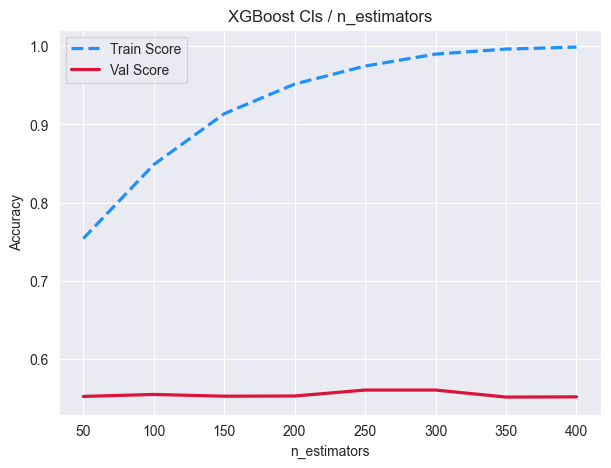

Results after max_depth tuning:
Best parameters: {'max_depth': 12}
Best score: {'accuracy': 0.5640}



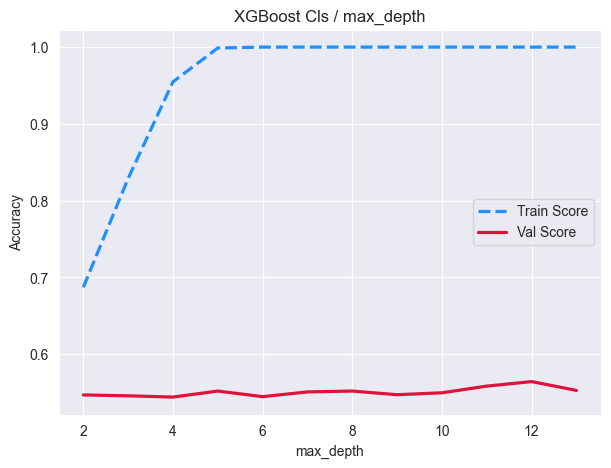

> TESTING...
Accuracy: 50.99%



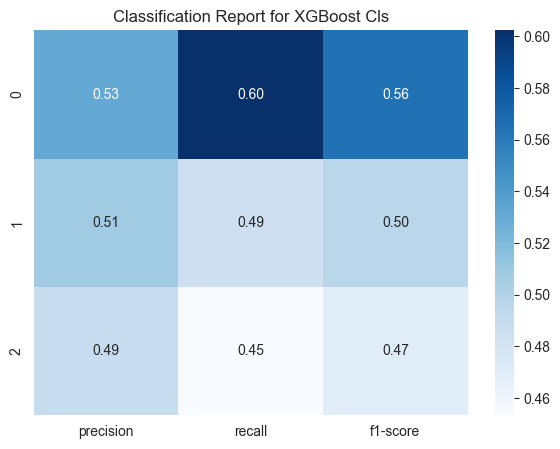

In [10]:
# tuning e testing
tune_and_test_models(df, cols, task="classification", resample=True, session_name="v2(resampled)")